# Importing the required libraries

In [7]:
from pyforest import *
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
import shutil
from tensorflow.keras.callbacks import EarlyStopping

# Passing the path of the files and saving it in the respective variables

In [8]:
with_maskImage = os.listdir('C:/Users/HITARTH SHAH/Desktop/Inmovidu_Python/with_mask/')
without_maskImage = os.listdir('C:/Users/HITARTH SHAH/Desktop/Inmovidu_Python/without_mask/')

# Checking the length of the files

In [9]:
print(len(with_maskImage))
print(len(without_maskImage))

690
686


# Making a directory to split the data into train, val and test for Mask and No      Mask

In [2]:
#os.mkdir('./train')
#os.mkdir('./train/with_mask')
#os.mkdir('./val')
#os.mkdir('./val/with_mask')
#os.mkdir('./test')
#os.mkdir('./test/with_mask')


#os.mkdir('./train/without_mask')
#os.mkdir('./val/without_mask')
#os.mkdir('./test/without_mask')

# With the help of 'shutil', the source path will be copied to destination path for both Mask and No Mask

In [10]:
with_mask_train_len = int(np.round(0.6 * len(with_maskImage), 0))
with_mask_val_len = int(np.round(0.7 * len(with_maskImage), 0))


for i in range(with_mask_train_len):
    shutil.copy(os.path.join('C:/Users/HITARTH SHAH/Desktop/Inmovidu_Python/with_mask/', with_maskImage[i]), './train/with_mask')

for i in range(with_mask_train_len, with_mask_val_len):
    shutil.copy(os.path.join('C:/Users/HITARTH SHAH/Desktop/Inmovidu_Python/with_mask/', with_maskImage[i]), './val/with_mask')

for i in range(with_mask_val_len, len(with_maskImage)):
    shutil.copy(os.path.join('C:/Users/HITARTH SHAH/Desktop/Inmovidu_Python/with_mask/', with_maskImage[i]), './test/with_mask')
    

without_mask_train_len = int(np.round(0.6 * len(without_maskImage), 0))
without_mask_val_len = int(np.round(0.7 * len(without_maskImage), 0))



for i in range(without_mask_train_len):
    shutil.copy(os.path.join('C:/Users/HITARTH SHAH/Desktop/Inmovidu_Python/without_mask/', without_maskImage[i]), './train/without_mask')

for i in range(without_mask_train_len, without_mask_val_len):
    shutil.copy(os.path.join('C:/Users/HITARTH SHAH/Desktop/Inmovidu_Python/without_mask/', without_maskImage[i]), './val/without_mask')

for i in range(without_mask_val_len, len(without_maskImage)):
    shutil.copy(os.path.join('C:/Users/HITARTH SHAH/Desktop/Inmovidu_Python/without_mask/', without_maskImage[i]), './test/without_mask')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Now, the final path for train, val and test for Mask and No Mask will be saved in another variables which will be the seperate path for train, val and test

In [11]:
PATH_TRAIN_MASK = './train/with_mask'
PATH_VAL_MASK = './val/with_mask'
PATH_TEST_MASK = './test/with_mask'

PATH_TRAIN_NO_MASK = './train/without_mask'
PATH_VAL_NO_MASK = './val/without_mask'
PATH_TEST_NO_MASK = './test/without_mask'

PATH_TRAIN = './train'
PATH_VAL = './val'
PATH_TEST = './test'

# Checking the length of the data for train, val and test for Mask

In [12]:
print(len(os.listdir(PATH_TRAIN_MASK)))
print(len(os.listdir(PATH_VAL_MASK)))
print(len(os.listdir(PATH_TEST_MASK)))

414
69
207


# Checking the length of the data for train, val and test for No Mask

In [13]:
print(len(os.listdir(PATH_TRAIN_NO_MASK)))
print(len(os.listdir(PATH_VAL_NO_MASK)))
print(len(os.listdir(PATH_TEST_NO_MASK)))

412
68
206


# Now to access the train data for Mask and No Mask we need to save the files in new variables

In [14]:
train_mask_files = os.listdir(PATH_TRAIN_MASK)
train_no_mask_files = os.listdir(PATH_TRAIN_NO_MASK)

# Visualizing the images without mask

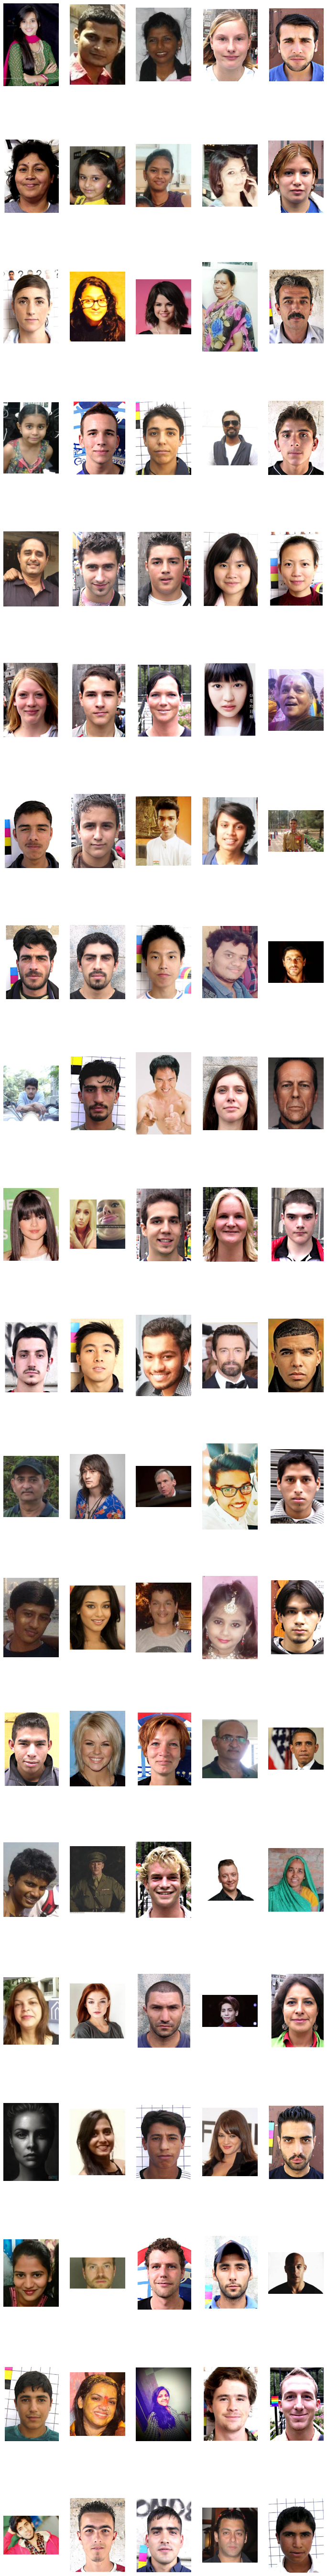

In [15]:
rows=20 #rows in subplots
cols=5 #columns in subplots

fig,ax = plt.subplots(rows,cols,figsize=(12,100))
r = 0
c = 0
for i in range(rows*cols):
    aa = plt.imread(os.path.join(PATH_TRAIN_NO_MASK,train_no_mask_files[i]))
    ax[r,c].axis("off")
    ax[r,c].imshow(aa)
    c+=1
    if c == cols:
        c=0
        r+=1
plt.show()

# Visualizing the images with mask

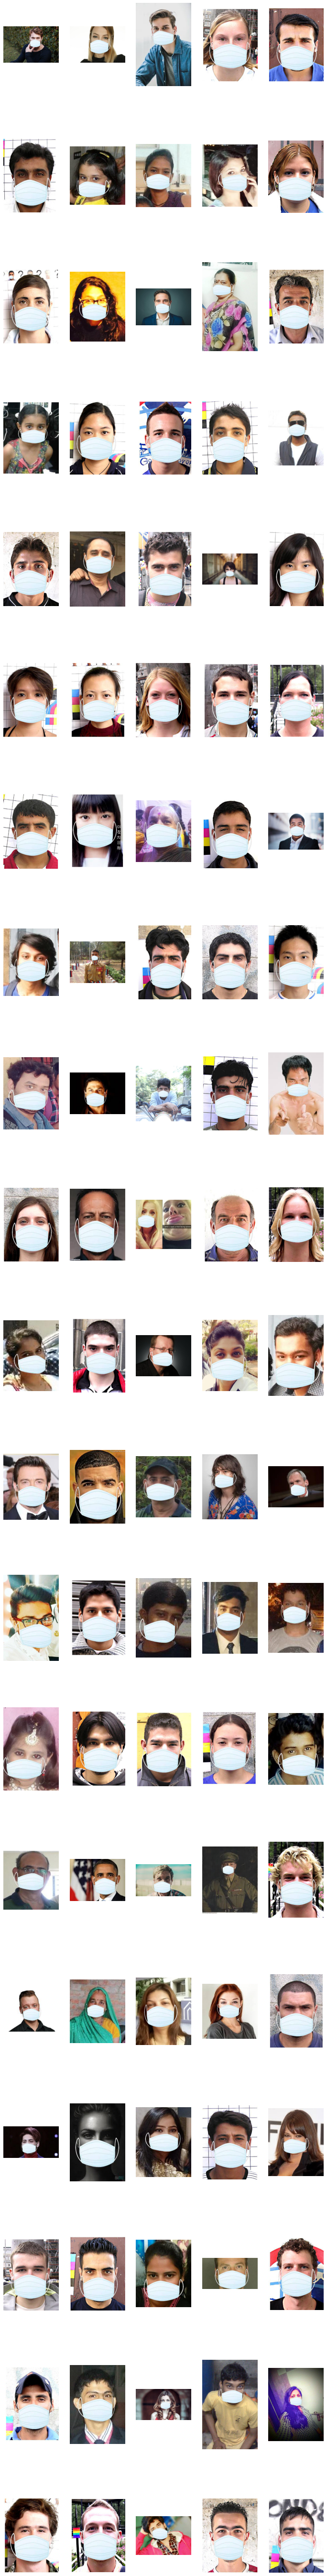

In [16]:
rows=20 #rows in subplots
cols=5 #columns in subplots

fig,ax = plt.subplots(rows,cols,figsize=(12,100))
r = 0
c = 0
for i in range(rows*cols):
    aa = plt.imread(os.path.join(PATH_TRAIN_MASK,train_mask_files[i]))
    ax[r,c].axis("off")
    ax[r,c].imshow(aa)
    c+=1
    if c == cols:
        c=0
        r+=1
plt.show()

# Importing the DataGenerator library and rescaling the images 

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

train_data_gen = ImageDataGenerator(rotation_range=30,
                                    width_shift_range=0.02,
                                    height_shift_range=0.02,
                                    zoom_range=[0.8,1.2],
                                    horizontal_flip=True,
                                    rescale=1/255
                                   )

val_data_gen = ImageDataGenerator(rescale=1/255)
test_data_gen = ImageDataGenerator(rescale=1/255)

# Checking the total images that belong to train, val and test

In [18]:
training_data = train_data_gen.flow_from_directory(PATH_TRAIN, target_size=(200, 200), color_mode='rgb', class_mode='binary', batch_size=32)
val_data = val_data_gen.flow_from_directory(PATH_VAL, target_size=(200, 200), color_mode='rgb', class_mode='binary', batch_size=32)
test_data = test_data_gen.flow_from_directory(PATH_TEST, target_size=(200, 200), color_mode='rgb', class_mode='binary', batch_size=32)

Found 826 images belonging to 2 classes.
Found 137 images belonging to 2 classes.
Found 413 images belonging to 2 classes.


# Checking the class indices which will give us the binary value

In [19]:
training_data.class_indices

{'with_mask': 0, 'without_mask': 1}

# Getting the shape of the images of training data

In [20]:
training_data.image_shape

(200, 200, 3)

# Creating the model

In [21]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=3, strides=1, activation='relu', input_shape=training_data.image_shape))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'))


model.add(Conv2D(filters=128, kernel_size=3, strides=1, activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(filters=512, kernel_size=3, strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'))


model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Taking the EarlyStopping to prevent the data from getting overfit 

In [22]:
early_stop = EarlyStopping(monitor='val_loss', patience=4, mode='min')

# Fitting the data

In [23]:
history = model.fit(training_data, batch_size=32, epochs=5, validation_data=val_data, callbacks=early_stop)

Epoch 1/5
26/26 [==============================] - ETA: 1s - loss: 0.6941 - accuracy: 0.50 - ETA: 3:33 - loss: 0.9802 - accuracy: 0.45 - ETA: 4:08 - loss: 0.8827 - accuracy: 0.48 - ETA: 4:05 - loss: 0.8387 - accuracy: 0.46 - ETA: 3:55 - loss: 0.8083 - accuracy: 0.51 - ETA: 3:43 - loss: 0.7903 - accuracy: 0.51 - ETA: 3:28 - loss: 0.7752 - accuracy: 0.52 - ETA: 3:14 - loss: 0.7661 - accuracy: 0.51 - ETA: 3:01 - loss: 0.7598 - accuracy: 0.50 - ETA: 2:49 - loss: 0.7542 - accuracy: 0.49 - ETA: 2:41 - loss: 0.7485 - accuracy: 0.50 - ETA: 2:29 - loss: 0.7439 - accuracy: 0.50 - ETA: 2:17 - loss: 0.7401 - accuracy: 0.49 - ETA: 2:05 - loss: 0.7364 - accuracy: 0.51 - ETA: 1:54 - loss: 0.7337 - accuracy: 0.50 - ETA: 1:42 - loss: 0.7313 - accuracy: 0.49 - ETA: 1:32 - loss: 0.7288 - accuracy: 0.50 - ETA: 1:21 - loss: 0.7267 - accuracy: 0.50 - ETA: 1:10 - loss: 0.7254 - accuracy: 0.49 - ETA: 1:00 - loss: 0.7236 - accuracy: 0.49 - ETA: 51s - loss: 0.7218 - accuracy: 0.5015 - ETA: 40s - loss: 0.7199 - 

# Storing the result of train data in a new dataframe and visualizing it 

In [24]:
loss_df = pd.DataFrame(history.history)
loss_df

<IPython.core.display.Javascript object>

loss  accuracy  val_loss  val_accuracy
0  0.711681  0.519370  0.613120      0.919708
1  0.298332  0.903148  0.264517      0.875912
2  0.115531  0.961259  0.074199      0.970803
3  0.130327  0.947942  0.755727      0.868613
4  0.165669  0.946731  0.051798      0.970803

# Plotting the data

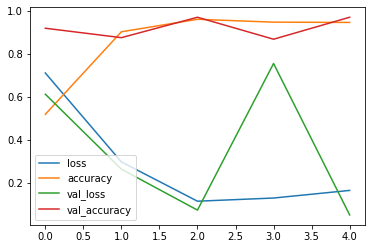

In [36]:
loss_df.plot()
plt.legend(loc=3)

# Getting the binary values of the images of test data

In [26]:
test_data.class_indices

{'with_mask': 0, 'without_mask': 1}

# Evaluating the test data

In [27]:
model.evaluate(test_data)

13/13 [==============================] - ETA: 0s - loss: 0.0533 - accuracy: 0.96 - ETA: 15s - loss: 0.0679 - accuracy: 0.968 - ETA: 18s - loss: 0.0573 - accuracy: 0.979 - ETA: 19s - loss: 0.0715 - accuracy: 0.976 - ETA: 18s - loss: 0.0640 - accuracy: 0.975 - ETA: 17s - loss: 0.0547 - accuracy: 0.979 - ETA: 15s - loss: 0.0514 - accuracy: 0.982 - ETA: 13s - loss: 0.0505 - accuracy: 0.980 - ETA: 10s - loss: 0.0513 - accuracy: 0.982 - ETA: 7s - loss: 0.0480 - accuracy: 0.984 - ETA: 5s - loss: 0.0752 - accuracy: 0.98 - ETA: 2s - loss: 0.0803 - accuracy: 0.97 - ETA: 0s - loss: 0.0803 - accuracy: 0.97 - 35s 3s/step - loss: 0.0803 - accuracy: 0.9782


[0.08031017333269119, 0.9782082438468933]

# Predicting the test data

In [28]:
prediction = model.predict(test_data).flatten()

# Printing the result of prediction

In [29]:
print(prediction)

[2.74978738e-05 1.19307901e-04 9.98902321e-01 9.95523632e-01
 4.60803509e-04 9.91939187e-01 9.99415755e-01 9.98589516e-01
 1.38458610e-03 9.99575377e-01 3.69489193e-03 9.98673320e-01
 2.55882144e-02 2.10581154e-01 9.98642802e-01 9.87208366e-01
 4.02906537e-03 1.19307901e-04 9.87208366e-01 9.97575402e-01
 9.98502016e-01 5.22789359e-03 9.99881029e-01 9.74263072e-01
 8.84622335e-03 9.84738588e-01 9.86459792e-01 9.99998450e-01
 7.13047411e-05 9.99990523e-01 6.04798333e-05 9.99999404e-01
 2.66686082e-03 9.80988383e-01 1.56925798e-05 9.98847008e-01
 1.41948462e-04 9.85540509e-01 2.06062198e-03 9.99965906e-01
 2.41041183e-04 9.68724489e-04 9.99989748e-01 9.91669297e-03
 9.97657537e-01 1.80733204e-03 1.67649268e-05 9.99799967e-01
 9.98626232e-01 2.90963024e-01 9.98556376e-01 9.88315582e-01
 4.86741601e-06 7.69098103e-02 9.87335682e-01 9.99983609e-01
 4.94867563e-04 9.91790414e-01 4.70629483e-01 9.96750474e-01
 1.73524022e-03 9.99141872e-01 9.99934614e-01 2.78507292e-01
 2.51114368e-04 9.999691

# Rounding the result of prediction in 0 and 1

In [30]:
prediction = np.round(prediction)

<IPython.core.display.Javascript object>

# Printing the prediction

In [31]:
prediction

array([0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 0.

# Importing the libraries confusion matrix and classification report from sklearn

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix

Text(33.0, 0.5, 'Actual')

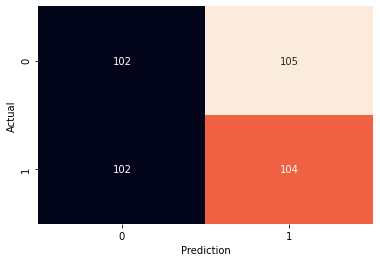

In [33]:
y_test = test_data.classes
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, cbar=False, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

# Classification Report 

In [34]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50       207
           1       0.50      0.50      0.50       206

    accuracy                           0.50       413
   macro avg       0.50      0.50      0.50       413
weighted avg       0.50      0.50      0.50       413

